In [1]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import pearsonr
from numpy import std, mean, sqrt
import matplotlib.pyplot as plt

In [2]:
df_bl_120=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/Baseline_Tesla_WinAutomate_120s+60s_cooldown_new/df_bl_120.csv')
df_bl_600=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/Baseline_Tesla_600+60/df_bl_600.csv')
df_dt=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/1/df_dt.csv')
df_lr=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/2/df_lr.csv')
df_svm=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/4_SVM/df_svm.csv')
df_nn=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/3_NN/df_nn.csv')

In [3]:
#credit: https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

In [4]:
cpu_bl120 = df_bl_120['CPU']
ram_bl120 = df_bl_120['RAM']
el_power_bl120 = df_bl_120['Wert 1-avg[W]']

#600+ 60
cpu_bl_600= df_bl_600['CPU']
ram_bl_600= df_bl_600['RAM']
el_power_bl_600= df_bl_600['Wert 1-avg[W]']

#dt
cpu_dt = df_dt['CPU']
ram_dt = df_dt['RAM']
el_power_dt = df_dt['Wert 1-avg[W]']

#lr
cpu_lr = df_lr['CPU']
ram_lr = df_lr['RAM']
el_power_lr = df_lr['Wert 1-avg[W]']

#svm
cpu_svm = df_svm['CPU']
ram_svm = df_svm['RAM']
el_power_svm = df_svm['Wert 1-avg[W]']

#nn
cpu_nn = df_nn['CPU']
ram_nn = df_nn['RAM']
el_power_nn = df_nn['Wert 1-avg[W]']

In [17]:
# Data for each boxplot
cpu_data = [cpu_bl120, cpu_bl_600, cpu_dt, cpu_lr, cpu_svm, cpu_nn]
ram_data = [ram_bl120, ram_bl_600, ram_dt, ram_lr, ram_svm, ram_nn]
power_data = [el_power_bl120.dropna(), el_power_bl_600.dropna(), el_power_dt.dropna(), el_power_lr.dropna(), el_power_svm.dropna(), el_power_nn.dropna()]

# Boxplot labels
labels = ['BL\n 120', 'BL\n 600', 'DT', 'LR', 'SVM', 'MLP']

# Create three boxplots for CPU, RAM, and Power
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

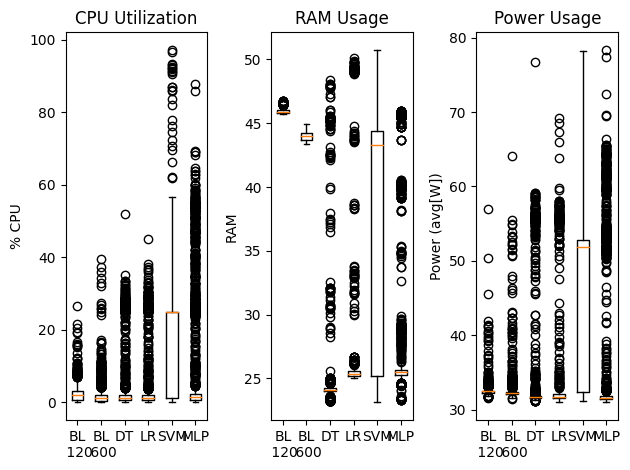

In [18]:
# Boxplot for CPU
plt.subplot(1, 3, 1)
plt.boxplot(cpu_data, labels=labels)
plt.title('CPU Utilization')
plt.ylabel('% CPU')

# Boxplot for RAM
plt.subplot(1, 3, 2)
plt.boxplot(ram_data, labels=labels)
plt.title('RAM Usage')
plt.ylabel('RAM')

# Boxplot for Power
plt.subplot(1, 3, 3)
plt.boxplot(power_data, labels=labels)
plt.title('Power Usage')
plt.ylabel('Power (avg[W])')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Text(0, 0.5, '% CPU')

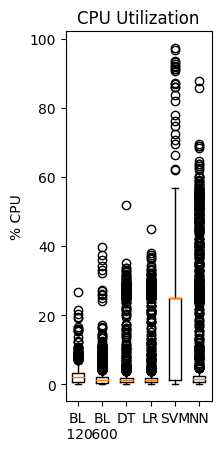

In [14]:
# Boxplot for CPU
plt.subplot(1, 3, 1)
plt.boxplot(cpu_data, labels=labels)
plt.title('CPU Utilization')
plt.ylabel('% CPU')


Text(0, 0.5, 'RAM')

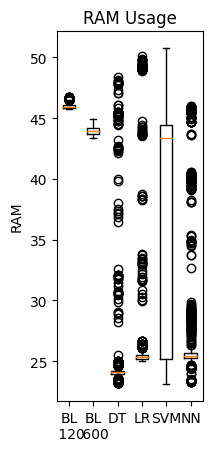

In [15]:
# Boxplot for RAM
plt.subplot(1, 3, 2)
plt.boxplot(ram_data, labels=labels)
plt.title('RAM Usage')
plt.ylabel('RAM')

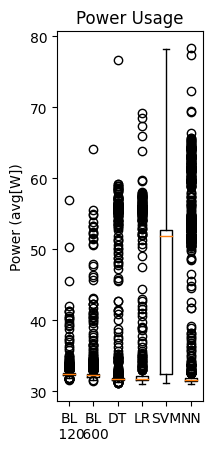

In [16]:
# Boxplot for Power
plt.subplot(1, 3, 3)
plt.boxplot(power_data, labels=labels)
plt.title('Power Usage')
plt.ylabel('Power (avg[W])')
plt.show()

In [6]:
groups_cpu = [cpu_dt,cpu_lr, cpu_nn]
for i in groups_cpu:
    print(stats.ttest_rel(cpu_bl120, i))
    print(pearsonr(cpu_bl120, i)[0])
    print(cohen_d(cpu_bl120, i))

Ttest_relResult(statistic=-0.8591237246517621, pvalue=0.3903289878614826)
0.10077319833319814
-0.01943469921361977
Ttest_relResult(statistic=-1.9674866628845809, pvalue=0.0492031600432554)
0.15611078877535223
-0.043636493751814484
Ttest_relResult(statistic=-16.28254756761321, pvalue=1.3765599093726153e-57)
0.10461724690357177
-0.37568732644303093


In [7]:
groups_cpu = [cpu_lr, cpu_nn]
for i in groups_cpu:
    print(stats.ttest_rel(cpu_dt, i))
    print(pearsonr(cpu_dt, i)[0])
    print(cohen_d(cpu_dt, i))

Ttest_relResult(statistic=-1.8122228778032115, pvalue=0.07003435377759866)
0.7960389118538117
-0.01923498008523689
Ttest_relResult(statistic=-17.551277386285143, pvalue=2.9479697004228777e-66)
0.428726390027681
-0.34578268164453096


In [19]:
print(stats.ttest_rel(cpu_lr, cpu_nn))
print(pearsonr(cpu_lr, cpu_nn)[0])
print(cohen_d(cpu_lr, cpu_nn))

Ttest_relResult(statistic=-16.834956387916915, pvalue=2.7033886986104514e-61)
0.4050575062662509
-0.3336997036310567


In [23]:
#bl600 & svm
print(stats.ttest_rel(cpu_bl_600, cpu_svm))
print(pearsonr(cpu_bl_600, cpu_svm)[0])
print(cohen_d(cpu_bl_600, cpu_svm))

Ttest_relResult(statistic=-141.5851017807833, pvalue=0.0)
0.014300473080402783
-1.4887461317832298


In [39]:
groups_ram = [ram_dt,ram_lr, ram_nn]
for i in groups_ram:
    print(stats.ttest_rel(ram_bl120, i))
    print(pearsonr(ram_bl120, i)[0])
    print(cohen_d(ram_bl120, i))

Ttest_relResult(statistic=417.59716944648284, pvalue=0.0)
0.06252788792690017
9.762216216292705
Ttest_relResult(statistic=355.3999386373365, pvalue=0.0)
0.07871592235356373
8.30344362369203
Ttest_relResult(statistic=260.0912928769322, pvalue=0.0)
0.06794885969137471
6.0861799240738925


In [30]:
groups_ram = [ram_lr, ram_nn]
for i in groups_ram:
    print(stats.ttest_rel(ram_dt, i))
    print(pearsonr(ram_dt, i)[0])
    print(cohen_d(ram_dt, i))

Ttest_relResult(statistic=-38.275220140004436, pvalue=1.4364868295818815e-269)
0.7777030163243064
-0.4268583905510143
Ttest_relResult(statistic=-26.60611069175962, pvalue=1.2186317730827482e-142)
0.2845235037826492
-0.5350111286200027


In [31]:
print(stats.ttest_rel(ram_lr, ram_nn))
print(pearsonr(ram_lr, ram_nn)[0])
print(cohen_d(ram_lr, ram_nn))

Ttest_relResult(statistic=-8.103031145443552, pvalue=7.252626974471086e-16)
0.2153486364494732
-0.1693140583409673


In [32]:
print(stats.ttest_rel(ram_bl_600, ram_svm))
print(pearsonr(ram_bl_600, ram_svm)[0])
print(cohen_d(ram_bl_600, ram_svm))

Ttest_relResult(statistic=122.12717085257238, pvalue=0.0)
0.05810508464484413
1.2839621210839447


In [33]:
groups_power = [el_power_dt.fillna(0),el_power_lr.fillna(0), el_power_nn.fillna(0)]
for i in groups_power:
    print(stats.ttest_rel(el_power_bl120.fillna(0), i))
    print(pearsonr(el_power_bl120.fillna(0), i)[0])
    print(cohen_d(el_power_bl120.fillna(0), i))

Ttest_relResult(statistic=-0.9368688281800149, pvalue=0.348888360066274)
0.0071659726011496835
-0.021910053005254743
Ttest_relResult(statistic=-1.1421940395303578, pvalue=0.2534487061957039)
0.01969120912353848
-0.026546726198472228
Ttest_relResult(statistic=-9.78550031465196, pvalue=2.448659007344812e-22)
0.02793394490434335
-0.22679501056239645


In [34]:
groups_power = [el_power_lr.fillna(0), el_power_nn.fillna(0)]
for i in groups_power:
    print(stats.ttest_rel(el_power_dt.fillna(0).fillna(0), i))
    print(pearsonr(el_power_dt.fillna(0).fillna(0), i)[0])
    print(cohen_d(el_power_dt.fillna(0), i))

Ttest_relResult(statistic=-0.22395168116748992, pvalue=0.8228075041225316)
0.2413302419826574
-0.004578291277309153
Ttest_relResult(statistic=-9.256161216383276, pvalue=3.526612881331033e-20)
0.1781453453004845
-0.1979867988186168


In [35]:
print(stats.ttest_rel(el_power_lr.fillna(0).fillna(0), el_power_nn.fillna(0)))
print(pearsonr(el_power_lr.fillna(0).fillna(0), el_power_nn.fillna(0))[0])
print(cohen_d(el_power_lr.fillna(0), i))

Ttest_relResult(statistic=-9.090189179792922, pvalue=1.588872711722031e-19)
0.19428630622637774
-0.19247137555056104


In [38]:
print(stats.ttest_rel(el_power_bl_600.fillna(0).fillna(0), el_power_svm.fillna(0)))
print(pearsonr(el_power_bl_600.fillna(0).fillna(0), el_power_svm.fillna(0))[0])
print(cohen_d(el_power_bl_600.fillna(0), el_power_svm.fillna(0)))

Ttest_relResult(statistic=-108.131328018008, pvalue=0.0)
-0.0032097772416301885
-1.1401164437296898
